Importing neccessary packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
df=pd.read_csv("KoshiProvinceProject.csv",encoding='ISO-8859-1')
df

,District,Local Level Name,Total family number,Total household number,Total population,Total Male,Total Female
0,Taplejung,Aathrai Tribeni Rural Municipality,2869,2735,12288,6005,6283
1,Taplejung,Maiwakhola Rural Municipality,2275,2178,10365,5264,5101
2,Taplejung,Meringden Rural Municipality,2683,2528,12040,6181,5859
3,Taplejung,Mikwakhola Rural Municipality,1862,1792,7991,4000,3991
4,Taplejung,Phaktanglung Rural Municipality,2864,2700,11925,6239,5686
...,...,...,...,...,...,...,...
124,Khotang,Kepilasagadhi Rural Municipality,3346,3237,13339,6583,6756
125,Khotang,Khotehang Rural Municipality,4149,4056,16952,8417,8535
126,Khotang,Rawa Besi Rural Municipality,2724,2646,11218,5424,5794
127,Khotang,Diktel Rupakot Majhuwagadhi Municipality,10719,9775,43295,21345,21950


Checking null values

In [4]:
pd.isnull(df).sum()

District                  0
Local Level Name          0
Total family number       0
Total household number    0
Total population          0
Total Male                0
Total Female              0
dtype: int64

EDA(Exploratary Data Analysis)

In [5]:
df_districts=df.groupby('District')['Total family number'].sum().sort_values(ascending=False).head(15)
df_districts

District
Morang           274651
Jhapa            246138
Sunsari          216874
Ilam              71558
Panchthar         42968
Khotang           42104
Sankhuwasabha     39300
Bhojpur           38920
Dhankuta          37888
Okhaldhunga       34689
Taplejung         28530
Solukhumbu        26402
Terhathum         22022
Name: Total family number, dtype: int64

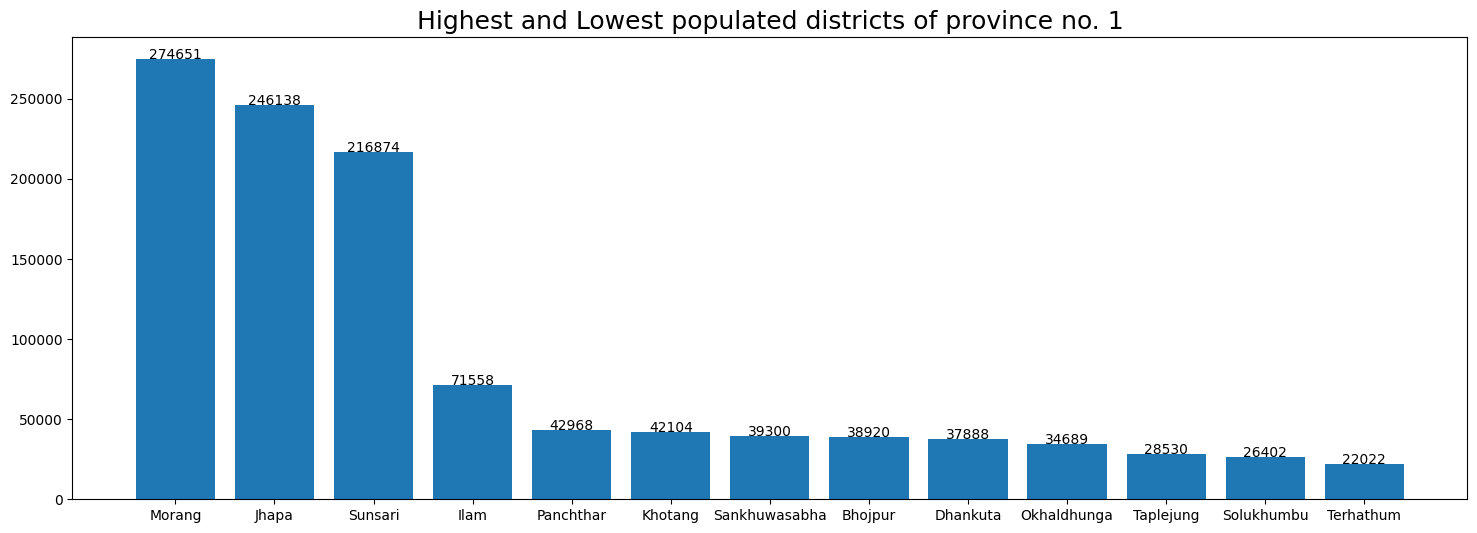

In [6]:
district=df_districts.index
number=df_districts.values
plt.figure(figsize=(18,6))
plt.bar(district,number)
plt.title("Highest and Lowest populated districts in terms of total family numbers of province no. 1",fontsize=18,color='black')
for d,n in zip(district,number):
    plt.text(d,n,str(n),ha='center')
plt.show()


In [7]:
df.head(5)

,District,Local Level Name,Total family number,Total household number,Total population,Total Male,Total Female
0,Taplejung,Aathrai Tribeni Rural Municipality,2869,2735,12288,6005,6283
1,Taplejung,Maiwakhola Rural Municipality,2275,2178,10365,5264,5101
2,Taplejung,Meringden Rural Municipality,2683,2528,12040,6181,5859
3,Taplejung,Mikwakhola Rural Municipality,1862,1792,7991,4000,3991
4,Taplejung,Phaktanglung Rural Municipality,2864,2700,11925,6239,5686


In [8]:
df_gen=df.groupby('District')[['Total Male','Total Female']].sum().sort_values(by=['Total Male'])
df_gen

,Total Male,Total Female
District,,
Terhathum,43563,45322
Solukhumbu,52629,52139
Taplejung,60524,59835
Okhaldhunga,69322,71592
Dhankuta,72669,76715
Bhojpur,77362,80455
Sankhuwasabha,77473,78984
Panchthar,85971,87302
Khotang,86521,88819


         District        Gender  Population
0          Morang    Total Male      557527
1           Jhapa    Total Male      477496
2         Sunsari    Total Male      452087
3            Ilam    Total Male      139518
4         Khotang    Total Male       86521
5       Panchthar    Total Male       85971
6   Sankhuwasabha    Total Male       77473
7         Bhojpur    Total Male       77362
8        Dhankuta    Total Male       72669
9     Okhaldhunga    Total Male       69322
10      Taplejung    Total Male       60524
11     Solukhumbu    Total Male       52629
12      Terhathum    Total Male       43563
13         Morang  Total Female      589659
14          Jhapa  Total Female      516594
15        Sunsari  Total Female      480365
16           Ilam  Total Female      140980
17        Khotang  Total Female       88819
18      Panchthar  Total Female       87302
19  Sankhuwasabha  Total Female       78984
20        Bhojpur  Total Female       80455
21       Dhankuta  Total Female 

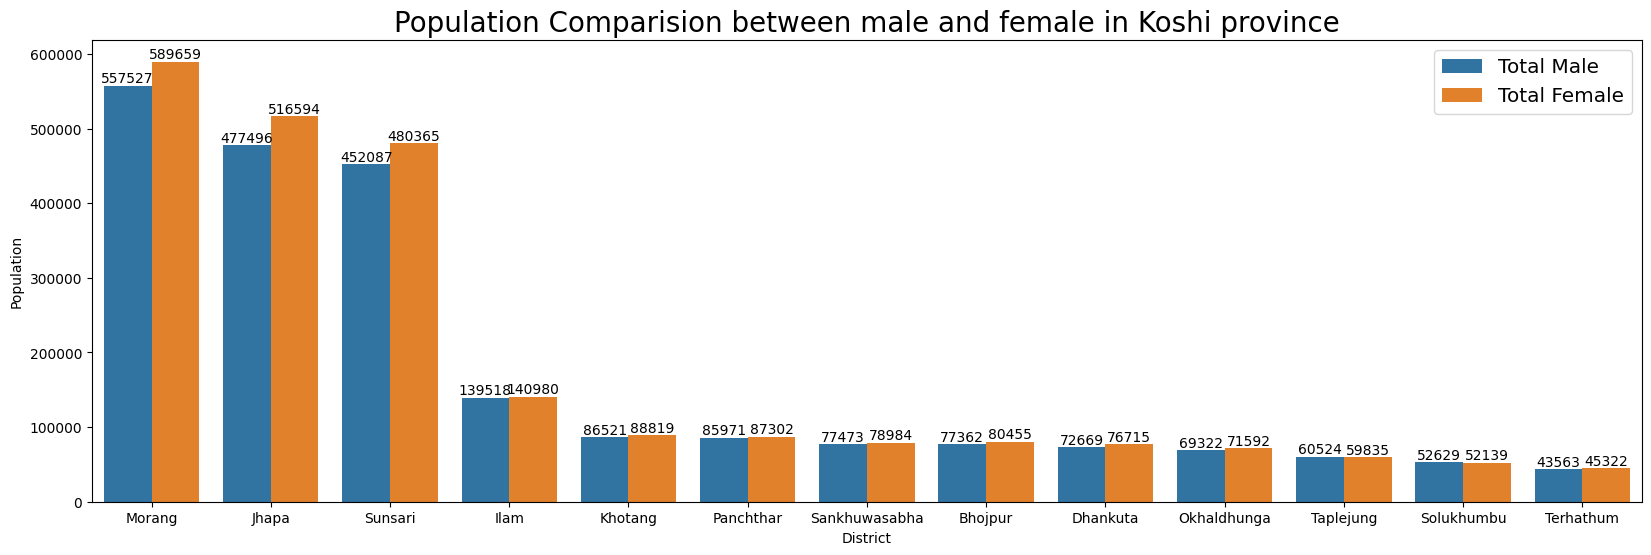

In [9]:

df_district=df.groupby('District')[['Total Male','Total Female']].sum().reset_index().sort_values(by=['Total Male'],ascending=False)
df_melted = pd.melt(df_district, id_vars=['District'], value_vars=['Total Male', 'Total Female'], 
                    var_name='Gender', value_name='Population')
print(df_melted)

plt.figure(figsize=(20,6))
plt.title("Population Comparision between male and female in Koshi province",size=20)
ax=sns.barplot(x='District',y='Population',hue='Gender',errorbar=None,data=df_melted)
for bars in ax.containers:
    ax.bar_label(bars,fmt='%d')
ax.legend(fontsize='x-large')    
    
plt.show()

    




In [10]:
df.columns

Index(['District', 'Local Level Name', 'Total family number',
       'Total household number', 'Total population', 'Total Male',
       'Total Female'],
      dtype='object')

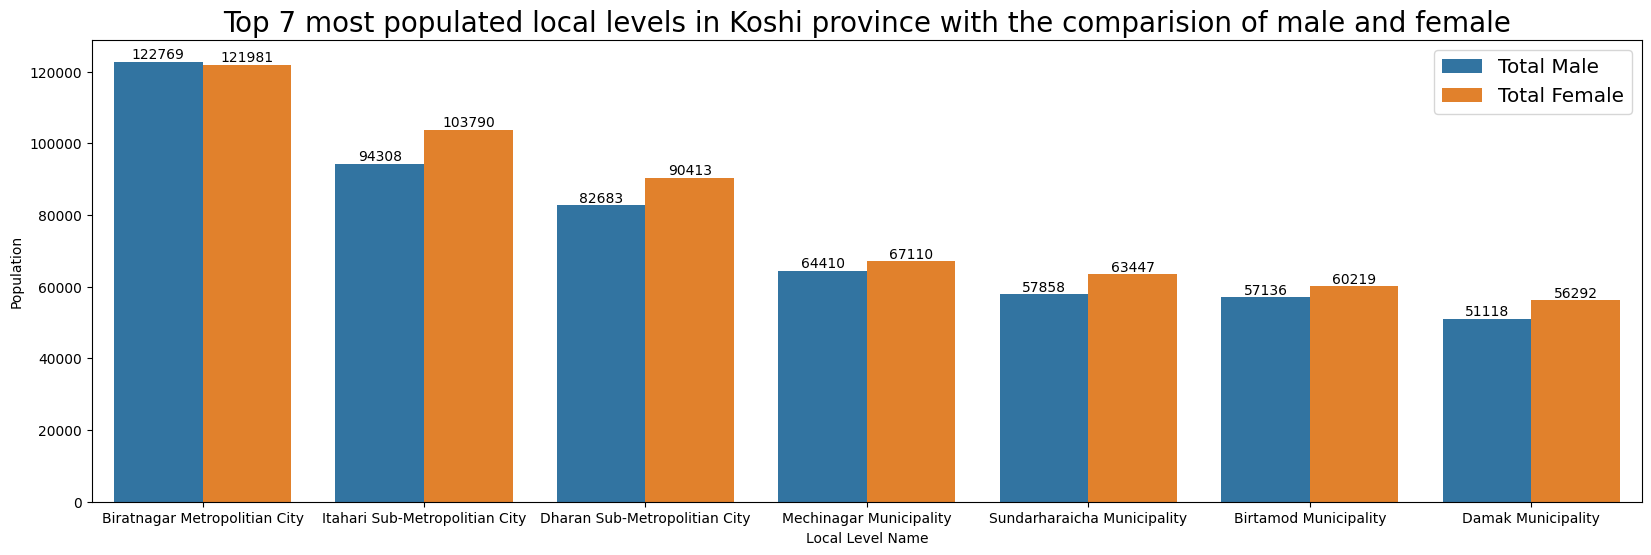

In [11]:
df_local=df.groupby('Local Level Name')[['Total Male','Total Female']].sum().reset_index().sort_values(by=['Total Male'],ascending=False).head(7)
df_melted_local=pd.melt(df_local,id_vars=['Local Level Name'],value_vars=['Total Male','Total Female'],var_name='Gender',value_name='Population')
plt.figure(figsize=(20,6))
plt.title("Top 7 most populated local levels in Koshi province with the comparision of male and female",size=20)
ax=sns.barplot(x='Local Level Name',y='Population',hue='Gender',data=df_melted_local)
for bars in ax.containers:
    ax.bar_label(bars)
ax.legend(fontsize='x-large')    
plt.show()    


In [12]:
df.columns

Index(['District', 'Local Level Name', 'Total family number',
       'Total household number', 'Total population', 'Total Male',
       'Total Female'],
      dtype='object')

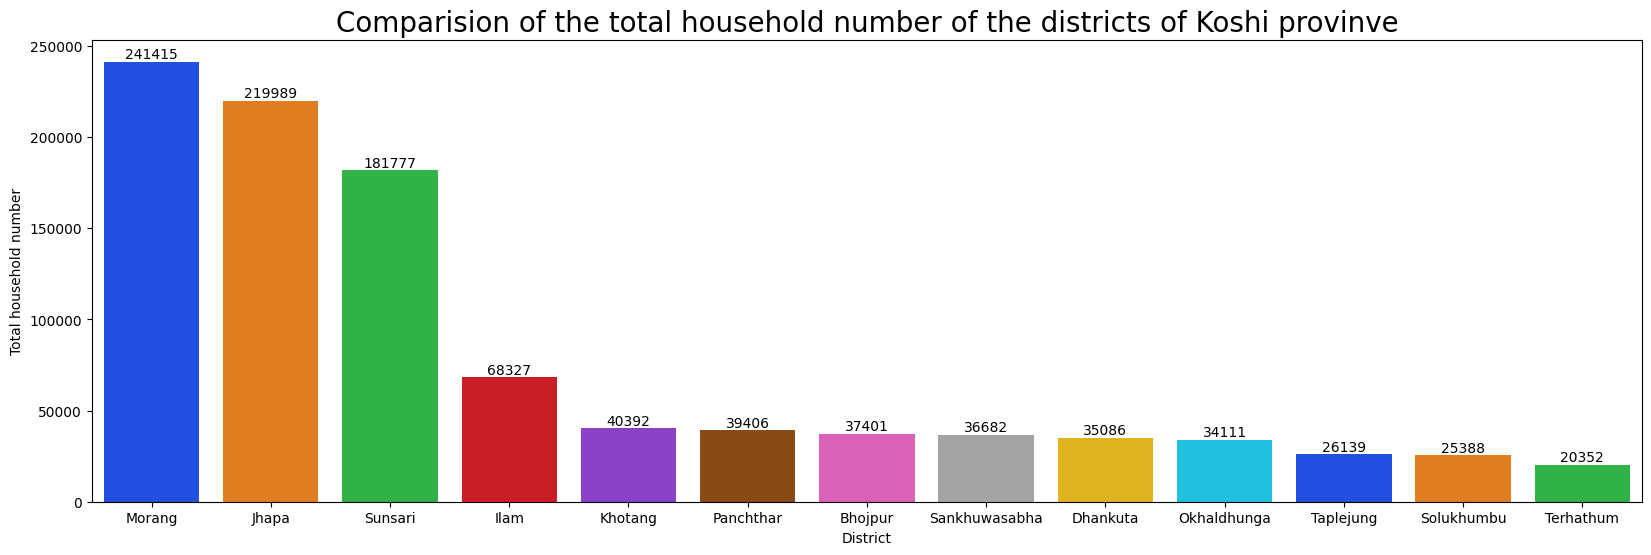

In [25]:
df_household=df.groupby('District')[['Total household number']].sum().reset_index().sort_values(by=['Total household number'],ascending=False).head(15)
df_gender=pd.melt(df,id_vars='District',value_vars=['Total Male','Total Female'],var_name='Gender',value_name='Population')
plt.figure(figsize=(20,6))
plt.title("Comparision of the total household number of the districts of Koshi provinve",size=20)
ax=sns.barplot(x='District',y='Total household number',data=df_household,palette='bright',hue='District',legend=False)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

From this we can conclude that the districts which highly contribute in the population of Koshi province is Morang in all terms such as household number,total population of both male and female,population in local levels etc and competition between male and females for the highest population is high in Morang.